In [25]:
import pandas as pd
import json
import gzip

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF("/Users/madhumithaganta/Downloads/AMAZON_FASHION.json.gz")

In [26]:
print(df.head(10))  # Display the first few rows

   overall  verified   reviewTime      reviewerID        asin  \
0      5.0      True  10 20, 2014  A1D4G1SNUZWQOT  7106116521   
1      2.0      True  09 28, 2014  A3DDWDH9PX2YX2  7106116521   
2      4.0     False  08 25, 2014  A2MWC41EW7XL15  7106116521   
3      2.0      True  08 24, 2014  A2UH2QQ275NV45  7106116521   
4      3.0     False  07 27, 2014   A89F3LQADZBS5  7106116521   
5      5.0      True  07 19, 2014  A29HLOUW0NS0EH  7106116521   
6      4.0      True  05 31, 2014   A7QS961ROI6E0  7106116521   
7      3.0      True  09 22, 2013  A1BB77SEBQT8VX  B00007GDFV   
8      3.0      True  07 17, 2013   AHWOW7D1ABO9C  B00007GDFV   
9      3.0      True  04 13, 2013   AKS3GULZE0HFC  B00007GDFV   

         reviewerName                                         reviewText  \
0               Tracy                             Exactly what I needed.   
1           Sonja Lau  I agree with the other review, the opening is ...   
2            Kathleen  Love these... I am going to order

In [27]:
print(df.info())  # Display information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
Index: 883636 entries, 0 to 883635
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         883636 non-null  float64
 1   verified        883636 non-null  bool   
 2   reviewTime      883636 non-null  object 
 3   reviewerID      883636 non-null  object 
 4   asin            883636 non-null  object 
 5   reviewerName    883544 non-null  object 
 6   reviewText      882403 non-null  object 
 7   summary         883103 non-null  object 
 8   unixReviewTime  883636 non-null  int64  
 9   vote            79900 non-null   object 
 10  style           304569 non-null  object 
 11  image           28807 non-null   object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 81.7+ MB
None


In [28]:
print(df.describe())  # Display summary statistics

            overall  unixReviewTime
count  883636.00000    8.836360e+05
mean        3.90694    1.456751e+09
std         1.41828    4.430691e+07
min         1.00000    1.036973e+09
25%         3.00000    1.434240e+09
50%         5.00000    1.462234e+09
75%         5.00000    1.484266e+09
max         5.00000    1.538352e+09


In [29]:
df.isnull().sum()

overall                0
verified               0
reviewTime             0
reviewerID             0
asin                   0
reviewerName          92
reviewText          1233
summary              533
unixReviewTime         0
vote              803736
style             579067
image             854829
dtype: int64

array([[<Axes: title={'center': 'overall'}>,
        <Axes: title={'center': 'unixReviewTime'}>]], dtype=object)

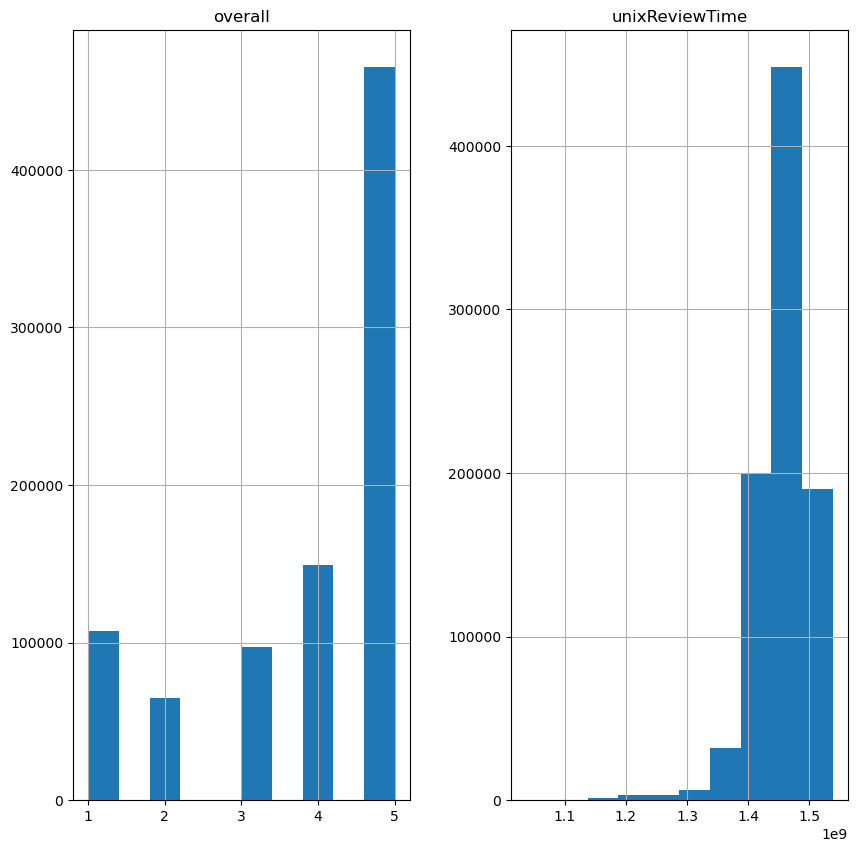

In [30]:
df.hist(figsize=(10, 10))

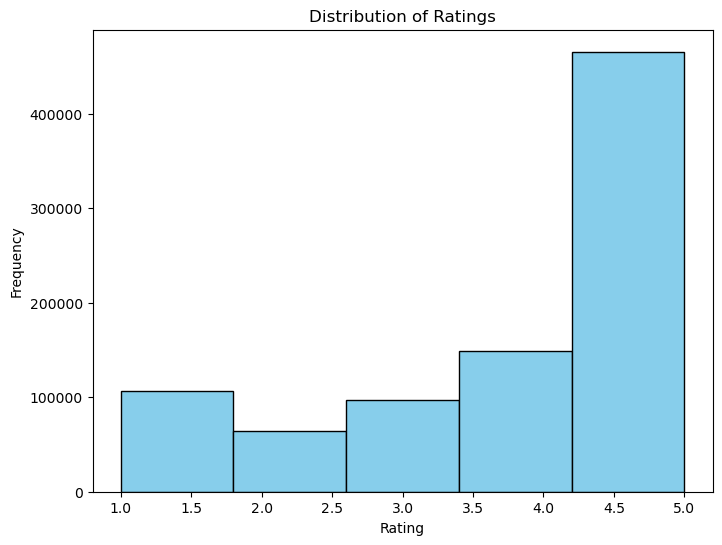

In [31]:
import matplotlib.pyplot as plt

# Plotting the distribution of ratings using a histogram
plt.figure(figsize=(8, 6))
plt.hist(df['overall'], bins=5, color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

In [32]:
sampled_df = df.sample(frac=0.1)

In [33]:
# Calculate average rating per product for the sampled data
avg_rating_per_product_sampled = sampled_df.groupby('asin')['overall'].mean()


In [34]:
# Print the average rating per product
print(avg_rating_per_product_sampled)

asin
1942705034    5.00
3293015344    3.00
9654263246    2.00
B00005OTJ8    5.00
B000072WTB    2.00
              ... 
B01HJB30HC    3.00
B01HJEOB1I    1.00
B01HJFD866    1.00
B01HJGJ9LS    2.25
B01HJHTH5U    5.00
Name: overall, Length: 42495, dtype: float64


In [35]:
# Convert to DataFrame and display
avg_rating_per_product_df = avg_rating_per_product_sampled.reset_index(name='average_rating')
print(avg_rating_per_product_df)

             asin  average_rating
0      1942705034            5.00
1      3293015344            3.00
2      9654263246            2.00
3      B00005OTJ8            5.00
4      B000072WTB            2.00
...           ...             ...
42490  B01HJB30HC            3.00
42491  B01HJEOB1I            1.00
42492  B01HJFD866            1.00
42493  B01HJGJ9LS            2.25
42494  B01HJHTH5U            5.00

[42495 rows x 2 columns]


In [36]:
# Find the most common average rating
most_common_rating = avg_rating_per_product_df['average_rating'].value_counts().idxmax()

print("The most common average rating is:", most_common_rating)

The most common average rating is: 5.0


In [37]:
average_rating_per_reviewer_sampled = sampled_df.groupby('reviewerID')['overall'].mean().reset_index()

In [38]:
# Print the average rating per product
print(average_rating_per_reviewer_sampled)

                 reviewerID  overall
0      A0007604Q2582KFW7N4B      5.0
1      A00248626G99Y8GVGKKQ      5.0
2      A0024936S1WI02OHH9DP      3.0
3      A00467084GHA3IAFG5WL      3.0
4      A0054271FXCGYGCKW9TH      3.5
...                     ...      ...
86364         AZZRKTO8KKHWL      4.0
86365         AZZT1ERHBSNQ8      3.0
86366         AZZWZWNGTHR2Z      2.0
86367         AZZXENCJHSM6H      2.0
86368         AZZY4Y48JMYGF      1.0

[86369 rows x 2 columns]


In [39]:
# Convert 'unixReviewTime' to timestamp if needed
df['reviewTime'] = pd.to_datetime(df['unixReviewTime'], unit='s')

# Extract time features
df['year'] = df['reviewTime'].dt.year
df['month'] = df['reviewTime'].dt.month
df['day'] = df['reviewTime'].dt.day
df['day_of_week'] = df['reviewTime'].dt.dayofweek  # Monday=0, Sunday=6


In [40]:
# Display the DataFrame with time features
print(df.tail())

        overall  verified reviewTime      reviewerID        asin  \
883631      5.0      True 2017-02-21  A1ZSB2Q144UTEY  B01HJHTH5U   
883632      5.0      True 2016-11-25  A2CCDV0J5VB6F2  B01HJHTH5U   
883633      3.0      True 2016-11-10  A3O90PACS7B61K  B01HJHTH5U   
883634      3.0      True 2016-11-10  A2HO94I89U3LNH  B01HJHF97K   
883635      5.0      True 2016-08-09  A2RSX9E79DUHRX  B01HJG5NMW   

               reviewerName  \
883631      Amazon Customer   
883632      Amazon Customer   
883633             Fabfifty   
883634               Mgomez   
883635  Natasha Mascarenhas   

                                               reviewText  \
883631  I absolutely love this dress!!  It's sexy and ...   
883632  I'm 5'6 175lbs. I'm on the tall side. I wear a...   
883633                         Too big in the chest area!   
883634                Too clear in the back, needs lining   
883635  Ordered and was slightly small. Worked with th...   

                                     

In [21]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [22]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

stop_words = set(stopwords.words('english'))
porter = PorterStemmer()

def preprocess_text(text):
    if isinstance(text, str):  # Check if the text is a string
        tokens = word_tokenize(text.lower())  # Tokenization and lowercase
        filtered_tokens = [porter.stem(token) for token in tokens if token.isalpha() and token not in stop_words]  # Stemming and removing stopwords
        return ' '.join(filtered_tokens)
    else:
        return ''

df['processed_text'] = df['reviewText'].apply(preprocess_text)

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/Users/madhumithaganta/nltk_data'
    - '/Users/madhumithaganta/anaconda3/nltk_data'
    - '/Users/madhumithaganta/anaconda3/share/nltk_data'
    - '/Users/madhumithaganta/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with a column 'processed_text' containing processed text data

# Concatenate all processed text into a single string
all_text = ' '.join(df['processed_text'].dropna())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axis
plt.title('Word Cloud of Most Frequent Words')
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming you have a DataFrame 'df' with a column 'processed_text' containing processed text data

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed

# Fit and transform the processed text data
tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_text'].dropna())

# Get feature names (words) from the TF-IDF vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Print the top keywords based on TF-IDF scores
top_keywords = sorted(zip(feature_names, tfidf_matrix.sum(axis=0).flat), key=lambda x: x[1], reverse=True)[:10]
print(top_keywords)

KeyError: 'processed_text'

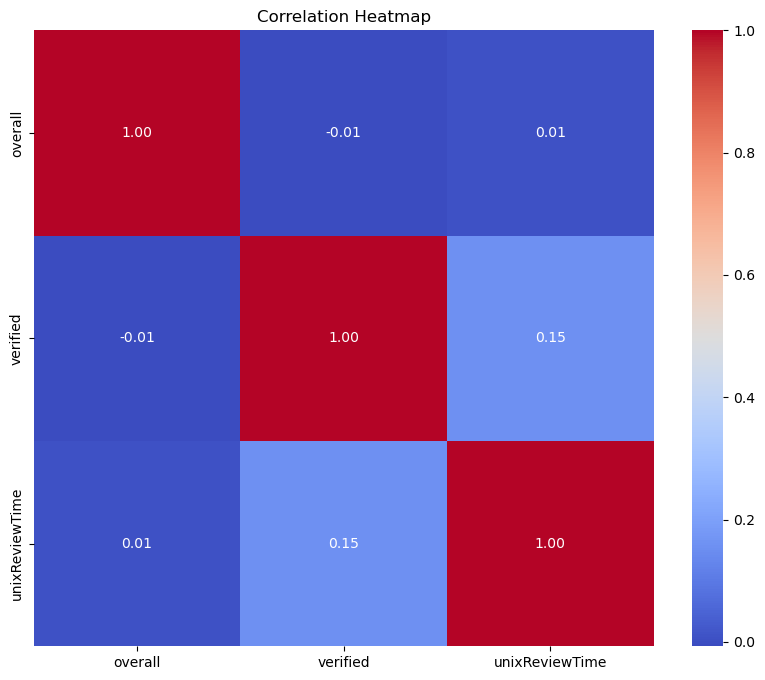

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data

# Convert 'verified' column to numeric (1 for True, 0 for False)
df['verified'] = df['verified'].astype(int)

# Select numeric columns for correlation analysis
numeric_cols = ['overall', 'verified', 'unixReviewTime']

# Compute correlation coefficients
correlation_matrix = df[numeric_cols].corr()

# Visualize correlations using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [21]:
# Find the ASIN with the most reviews
most_reviews_asin = df['asin'].value_counts().idxmax()

print("The ASIN with the most reviews is:", most_reviews_asin)

The ASIN with the most reviews is: B000V0IBDM


In [22]:
# Sort the DataFrame by the number of reviews in descending order
sorted_reviewers = average_rating_per_reviewer_sampled.sort_values(by='overall', ascending=False)

# Get the reviewer with the most reviews
most_reviews_reviewer = sorted_reviewers.iloc[0]

# Find the corresponding name for the reviewer
most_reviews_reviewer_name = sampled_df[sampled_df['reviewerID'] == most_reviews_reviewer['reviewerID']]['reviewerName'].iloc[0]

print("The reviewer with the most reviews is:", most_reviews_reviewer_name)
print("Number of reviews:", most_reviews_reviewer['overall'])

The reviewer with the most reviews is: gene
Number of reviews: 5.0


In [23]:
# Group the data by year and count the number of reviews in each year
reviews_per_year = df.groupby('year').size()

# Find the year with the most reviews
year_with_most_reviews = reviews_per_year.idxmax()
num_reviews_most_year = reviews_per_year.max()

print("The year with the most reviews is:", year_with_most_reviews)
print("Number of reviews in that year:", num_reviews_most_year)

The year with the most reviews is: 2016
Number of reviews in that year: 313629


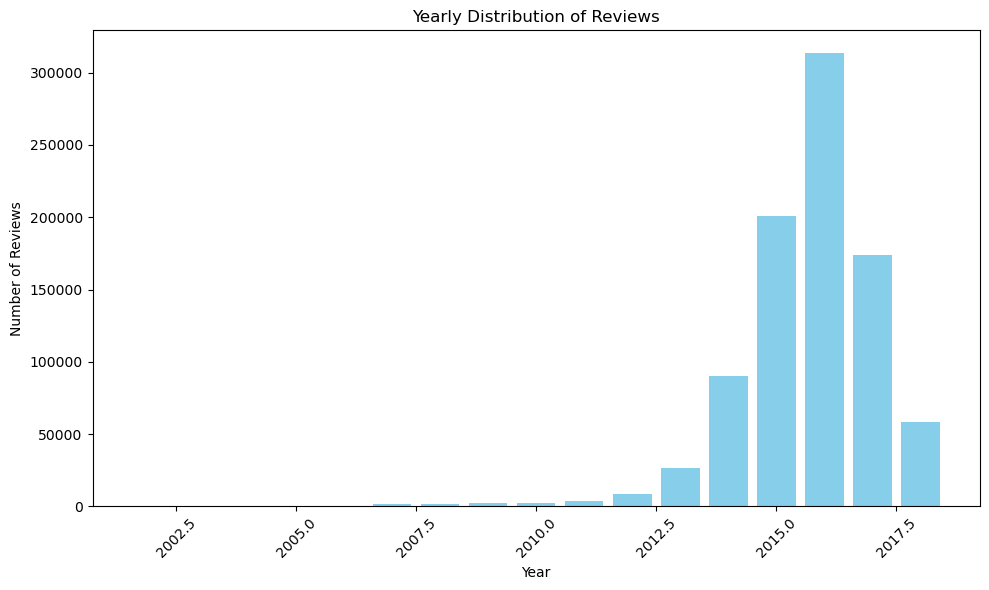

In [24]:
# Plotting the yearly distribution of reviews
plt.figure(figsize=(10, 6))
plt.bar(reviews_per_year.index, reviews_per_year.values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.title('Yearly Distribution of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
reviews_per_month = df.groupby('month').size()

# Find the month with the most reviews
month_with_most_reviews = reviews_per_month.idxmax()
num_reviews_most_month = reviews_per_month.max()

print("The month with the most reviews is:", month_with_most_reviews)
print("Number of reviews in that month:", num_reviews_most_month)

The month with the most reviews is: 1
Number of reviews in that month: 86170


In [26]:
# Group the data by reviewerID and count the number of reviews each reviewer has contributed
reviews_per_reviewer = df.groupby('reviewerID').size().reset_index(name='num_reviews')

# Sort the data to identify the top reviewers
top_reviewers = reviews_per_reviewer.sort_values(by='num_reviews', ascending=False).head(10)  # Change '10' to the desired number of top reviewers

# Display the top reviewers
print("Top Reviewers:")
print(top_reviewers)

Top Reviewers:
            reviewerID  num_reviews
484747  A3G5KDMFNRUXHB           40
502369  A3JBQHQZEZPQK4           36
152804  A1RRX286ZRI830           32
336862  A2PBHVTPTIIGKR           31
289496  A2GP4EJIAA2OE0           29
105824  A1J7RPYGVGH5O3           27
241356  A27WGWACHNQUR4           26
410337  A32M3PMH6DSLKD           26
669271   ALFRMOGTO1K4M           25
737078   AXRC1EH0U2WZ9           24


In [28]:
# Assuming 'df' is your original DataFrame containing the data
# Group the data by reviewerID and count the number of reviews each reviewer has contributed
reviews_per_reviewer = df.groupby('reviewerID').size().reset_index(name='num_reviews')

# Sort the data to identify the top reviewers
top_reviewers = reviews_per_reviewer.sort_values(by='num_reviews', ascending=False).head(10)  # Change '10' to the desired number of top reviewers

# Merge 'top_reviewers' with 'df' to get the names of the top reviewers
top_reviewers_with_names = pd.merge(top_reviewers, df[['reviewerID', 'reviewerName']].drop_duplicates(), on='reviewerID', how='left')

# Display the top reviewers with their names in one line
print("Top Reviewers with Names:")
print(top_reviewers_with_names[['reviewerID', 'reviewerName', 'num_reviews']].drop_duplicates())

Top Reviewers with Names:
       reviewerID                reviewerName  num_reviews
0  A3G5KDMFNRUXHB  michelle williams brewster           40
1  A3JBQHQZEZPQK4                   Cookie C.           36
2  A1RRX286ZRI830                    Patrycja           32
3  A2PBHVTPTIIGKR                T.T. da BOSS           31
4  A2GP4EJIAA2OE0                          LJ           29
5  A1J7RPYGVGH5O3                  shopaholic           27
6  A27WGWACHNQUR4                   Miss Lisa           26
7  A32M3PMH6DSLKD                      eunise           26
8   ALFRMOGTO1K4M                rosie thomas           25
9   AXRC1EH0U2WZ9                      sherry           24


In [29]:
# Count reviews per product (ASIN)
reviews_per_product = df.groupby('asin').size().reset_index(name='num_reviews')

# Calculate average ratings per product
avg_ratings_per_product = df.groupby('asin')['overall'].mean().reset_index(name='avg_rating')

# Measure variability in ratings (example using standard deviation)
ratings_std_per_product = df.groupby('asin')['overall'].std().reset_index(name='rating_std')

# Identify products with most reviews
most_reviews = reviews_per_product.sort_values(by='num_reviews', ascending=False).head(5)  # Change '5' to the desired number of products

# Identify products with highest average ratings
highest_avg_ratings = avg_ratings_per_product.sort_values(by='avg_rating', ascending=False).head(5)  # Change '5' to the desired number of products

# Identify products with most variability in ratings
most_variability = ratings_std_per_product.sort_values(by='rating_std', ascending=False).head(5)  # Change '5' to the desired number of products

# Display the results
print("Products with Most Reviews:")
print(most_reviews)
print("\nProducts with Highest Average Ratings:")
print(highest_avg_ratings)
print("\nProducts with Most Variability in Ratings:")
print(most_variability)

Products with Most Reviews:
             asin  num_reviews
3298   B000V0IBDM         4384
2453   B000KPIHQ4         4375
37176  B00I0VHS10         3889
71375  B00RLSCLJM         3638
2940   B000PHANNM         2572

Products with Highest Average Ratings:
             asin  avg_rating
0      0764443682         5.0
92972  B00Y88IVK6         5.0
92994  B00Y8MUW7M         5.0
92992  B00Y8LF6S8         5.0
92990  B00Y8FXRX0         5.0

Products with Most Variability in Ratings:
              asin  rating_std
181381  B01GREPK6Q    2.828427
39890   B00IUGHKBI    2.828427
39888   B00IUGHGLW    2.828427
144405  B01AYCIAHS    2.828427
10113   B0059R3Y9S    2.828427


In [30]:
# Group data by verified and non-verified purchases
grouped_verified = df[df['verified'] == True]
grouped_non_verified = df[df['verified'] == False]

# Calculate metrics
avg_ratings_verified = grouped_verified['overall'].mean()
avg_ratings_non_verified = grouped_non_verified['overall'].mean()
review_counts_verified = grouped_verified.shape[0]
review_counts_non_verified = grouped_non_verified.shape[0]

# Compare metrics
print("Average Ratings - Verified Purchases:", avg_ratings_verified)
print("Average Ratings - Non-Verified Purchases:", avg_ratings_non_verified)
print("Review Counts - Verified Purchases:", review_counts_verified)
print("Review Counts - Non-Verified Purchases:", review_counts_non_verified)

Average Ratings - Verified Purchases: 3.9042740488404113
Average Ratings - Non-Verified Purchases: 3.9471576533119754
Review Counts - Verified Purchases: 828699
Review Counts - Non-Verified Purchases: 54937


In [31]:
# Group data by product categories (ASINs)
grouped_categories = df.groupby('asin')

# Calculate metrics
avg_ratings_per_category = grouped_categories['overall'].mean()
review_counts_per_category = grouped_categories.size()

# Compare metrics
print("Average Ratings per Category:")
print(avg_ratings_per_category)
print("\nReview Counts per Category:")
print(review_counts_per_category)

Average Ratings per Category:
asin
0764443682    5.000000
1291691480    5.000000
1940280001    5.000000
1940735033    4.857143
1940967805    5.000000
                ...   
B01HJGXL4O    5.000000
B01HJGZVYW    4.000000
B01HJH7JY6    5.000000
B01HJHF97K    3.000000
B01HJHTH5U    4.625000
Name: overall, Length: 186189, dtype: float64

Review Counts per Category:
asin
0764443682    1
1291691480    1
1940280001    1
1940735033    7
1940967805    1
             ..
B01HJGXL4O    1
B01HJGZVYW    1
B01HJH7JY6    1
B01HJHF97K    1
B01HJHTH5U    8
Length: 186189, dtype: int64


In [32]:
# Group data by specific groups of reviewers
grouped_top_reviewers = df[df['reviewerID'].isin(top_reviewers['reviewerID'])]  # Assuming 'top_reviewers' contains top reviewer IDs
grouped_regular_reviewers = df[~df['reviewerID'].isin(top_reviewers['reviewerID'])]

# Calculate metrics
avg_ratings_top_reviewers = grouped_top_reviewers['overall'].mean()
avg_ratings_regular_reviewers = grouped_regular_reviewers['overall'].mean()
review_counts_top_reviewers = grouped_top_reviewers.shape[0]
review_counts_regular_reviewers = grouped_regular_reviewers.shape[0]

# Compare metrics
print("Average Ratings - Top Reviewers:", avg_ratings_top_reviewers)
print("Average Ratings - Regular Reviewers:", avg_ratings_regular_reviewers)
print("Review Counts - Top Reviewers:", review_counts_top_reviewers)
print("Review Counts - Regular Reviewers:", review_counts_regular_reviewers)

Average Ratings - Top Reviewers: 4.108108108108108
Average Ratings - Regular Reviewers: 3.9068727783186543
Review Counts - Top Reviewers: 296
Review Counts - Regular Reviewers: 883340
